In [1]:
!pip install pandas numpy scikit-learn matplotlib

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
file_path = '300lux.csv'  # Ganti dengan path file EEG Anda
eeg_data = pd.read_csv(file_path) # Sesuaikan nama sheet jika diperlukan
eeg_data.columns

Index(['Unnamed: 0', 'Date', 'Duration', 'Tag', 'Attention', 'Relaxation',
       'Delta', 'Theta', 'Low-Alpha', 'High-Alpha', 'Low-Beta', 'High-Beta',
       'Low-Gamma', 'Mid-Gamma', 'SyncRate', 'Time-set'],
      dtype='object')

In [7]:
eeg_columns = ['Delta', 'Theta', 'Low-Alpha', 'High-Alpha', 'Low-Beta', 'High-Beta', 'Low-Gamma', 'Mid-Gamma']

In [9]:
for col in eeg_data.columns:
    eeg_values=eeg_data[eeg_columns].values
    eeg_values

In [11]:
scaler = StandardScaler()
eeg_values_scaled = scaler.fit_transform(eeg_values)

In [13]:
pca = PCA(n_components=0.95)  # Pilih komponen yang menjelaskan 95% variansi
eeg_pca = pca.fit_transform(eeg_values_scaled)

In [15]:
explained_variance_ratio = pca.explained_variance_ratio_

In [17]:
cumulative_variance = np.cumsum(explained_variance_ratio)

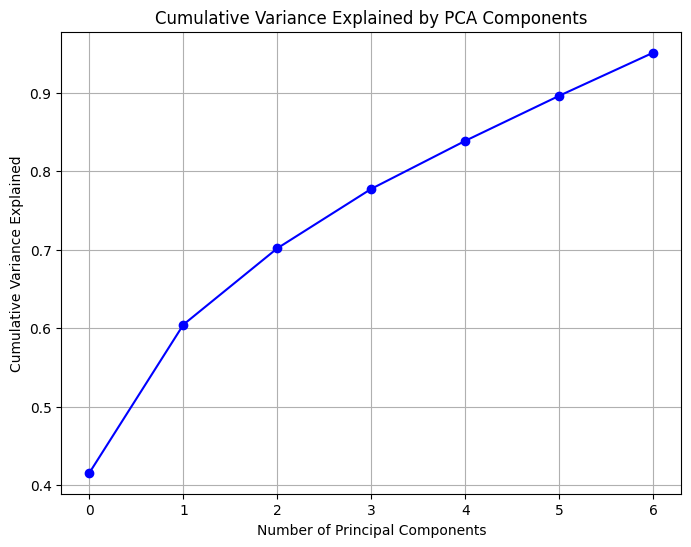

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', color='b')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

In [21]:
explained_variance = pca.explained_variance_

In [23]:
print(f'Jumlah komponen utama yang dipilih: {pca.n_components_}')
print(f'Varians yang dijelaskan oleh tiap komponen utama: {explained_variance}')

Jumlah komponen utama yang dipilih: 7
Varians yang dijelaskan oleh tiap komponen utama: [3.32555461 1.5106649  0.77864409 0.60603706 0.48960944 0.45937823
 0.43943338]


In [25]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Persentase varians yang dijelaskan oleh tiap komponen utama: {explained_variance_ratio}')

Persentase varians yang dijelaskan oleh tiap komponen utama: [0.41565982 0.18881744 0.09732243 0.07574834 0.0611961  0.05741751
 0.05492461]
